In [27]:
import os
import io

from IPython.display import Image
from google.cloud import vision

In [2]:
os.environ["PROJECT_ID"] = "text-analysis-323506"

#### Create a new Google Cloud service account to access the APIs programmatically.

In [4]:
%%bash

# These should be run only once. These commands setup a cloud service account with required permissions to call APIs
gcloud iam service-accounts create my-vision-sa --display-name "vision api account"
gcloud iam service-accounts keys create ~/key.json --iam-account my-vision-sa@${PROJECT_ID}.iam.gserviceaccount.com

created key [292a58b7b438aac6308fb2806275c10387c8d635] of type [json] as [/home/jupyter/key.json] for [my-vision-sa@text-analysis-323506.iam.gserviceaccount.com]


In [7]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = os.path.abspath("/home/jupyter/key.json")

#### Create a Google Cloud Vision api client object

In [8]:
vision_client = vision.ImageAnnotatorClient()

## Text Detection

This API detects all kinds of texts in the input image. 

In [74]:
img_path = './data/gsuite.jpg'

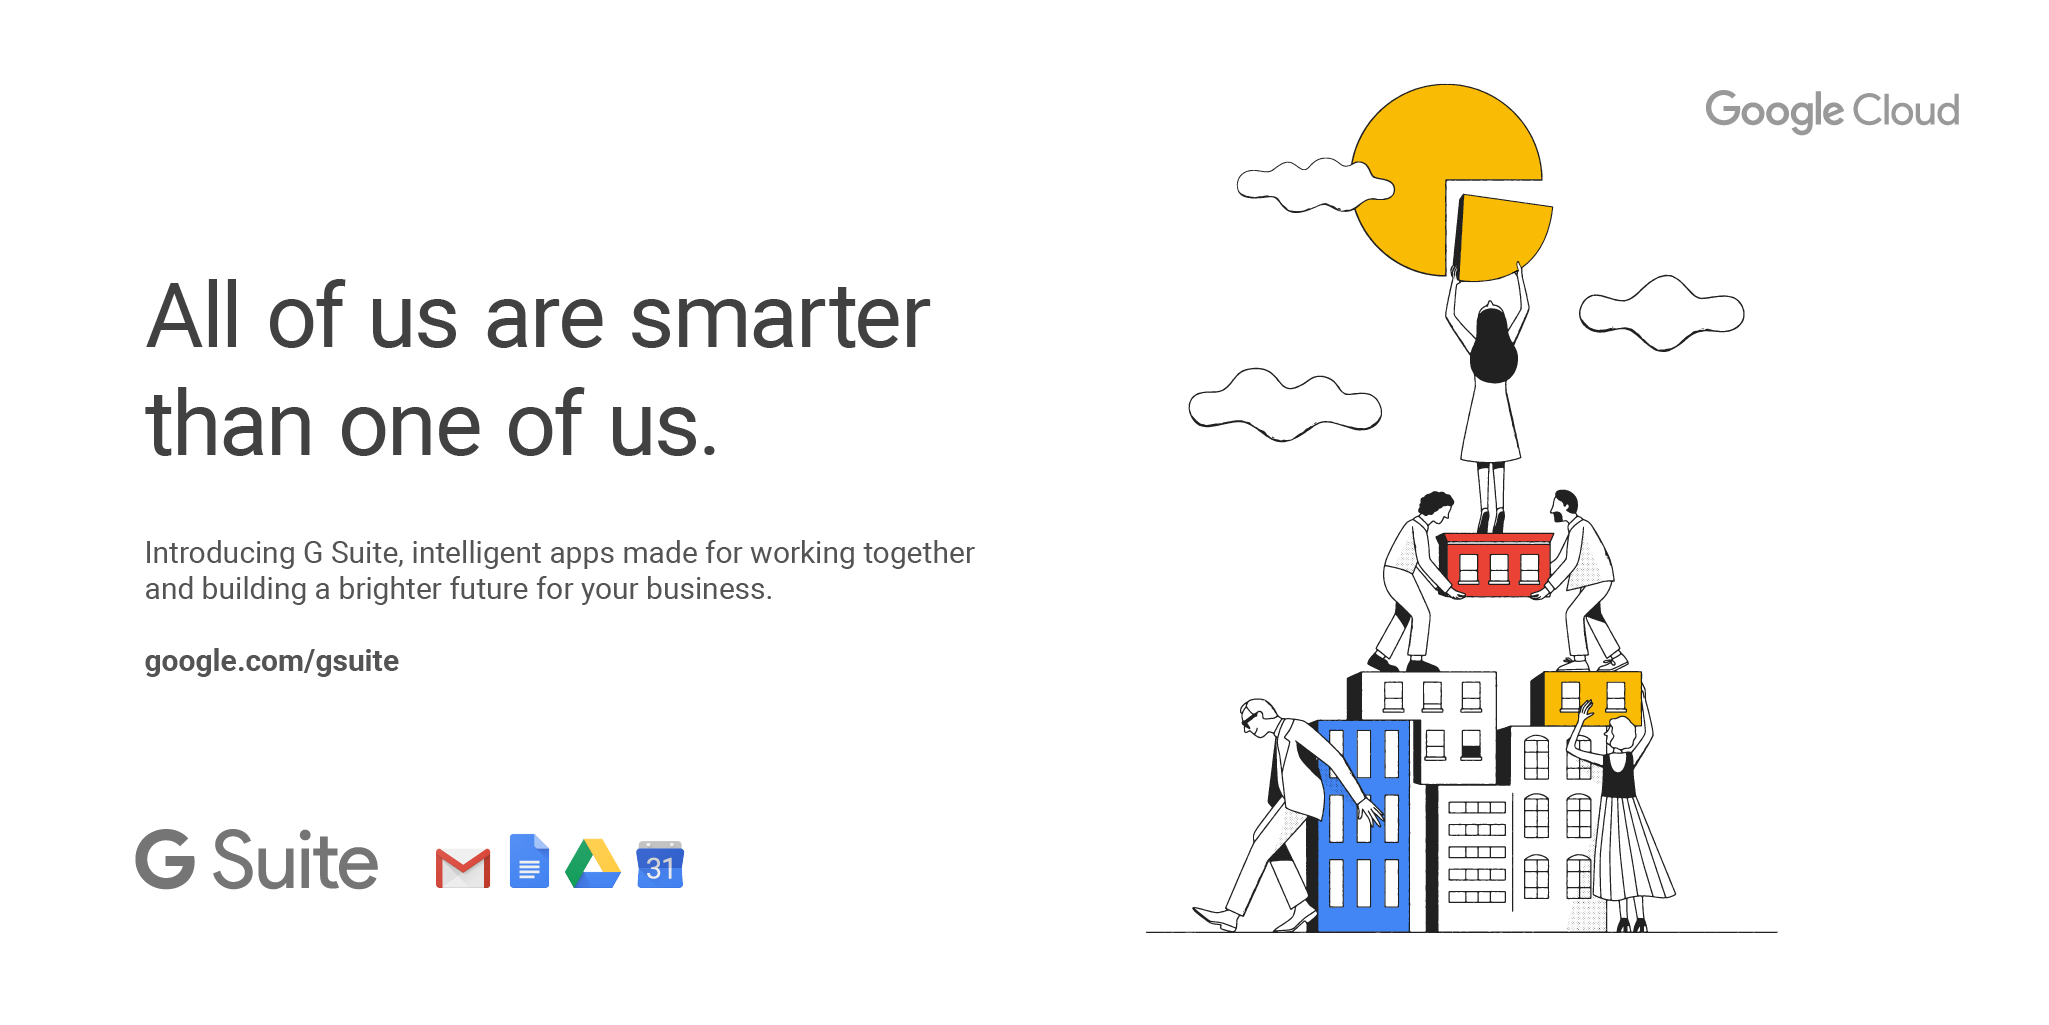

In [77]:
Image(filename=img_path, width=700, height=500) 

In [78]:
with io.open(img_path, 'rb') as image_file:
    content = image_file.read()
    
image_object = vision.Image(content=content)

In [79]:
# Send a request to cloud vision api client to detect texts in input image
response = vision_client.text_detection(image=image_object)

In [80]:
response.text_annotations[0].description.replace('\n', '\n ')

'Google Cloud\n All of us are smarter\n than one of us.\n Introducing G Suite, intelligent apps made for working together\n and building a brighter future for your business.\n google.com/gsuite\n G Suite MB AE\n h田田\n 田 田田\n '

##### As it can be seen, vision api's text_detection end point was able to detect all the texts in the image. It even added new line characters